# Importation des packages 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Expoloration des données

Description des données

In [2]:
# Charger la base de données
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [7]:
data.duplicated().sum()

0

# Analyses descriptives univariées

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


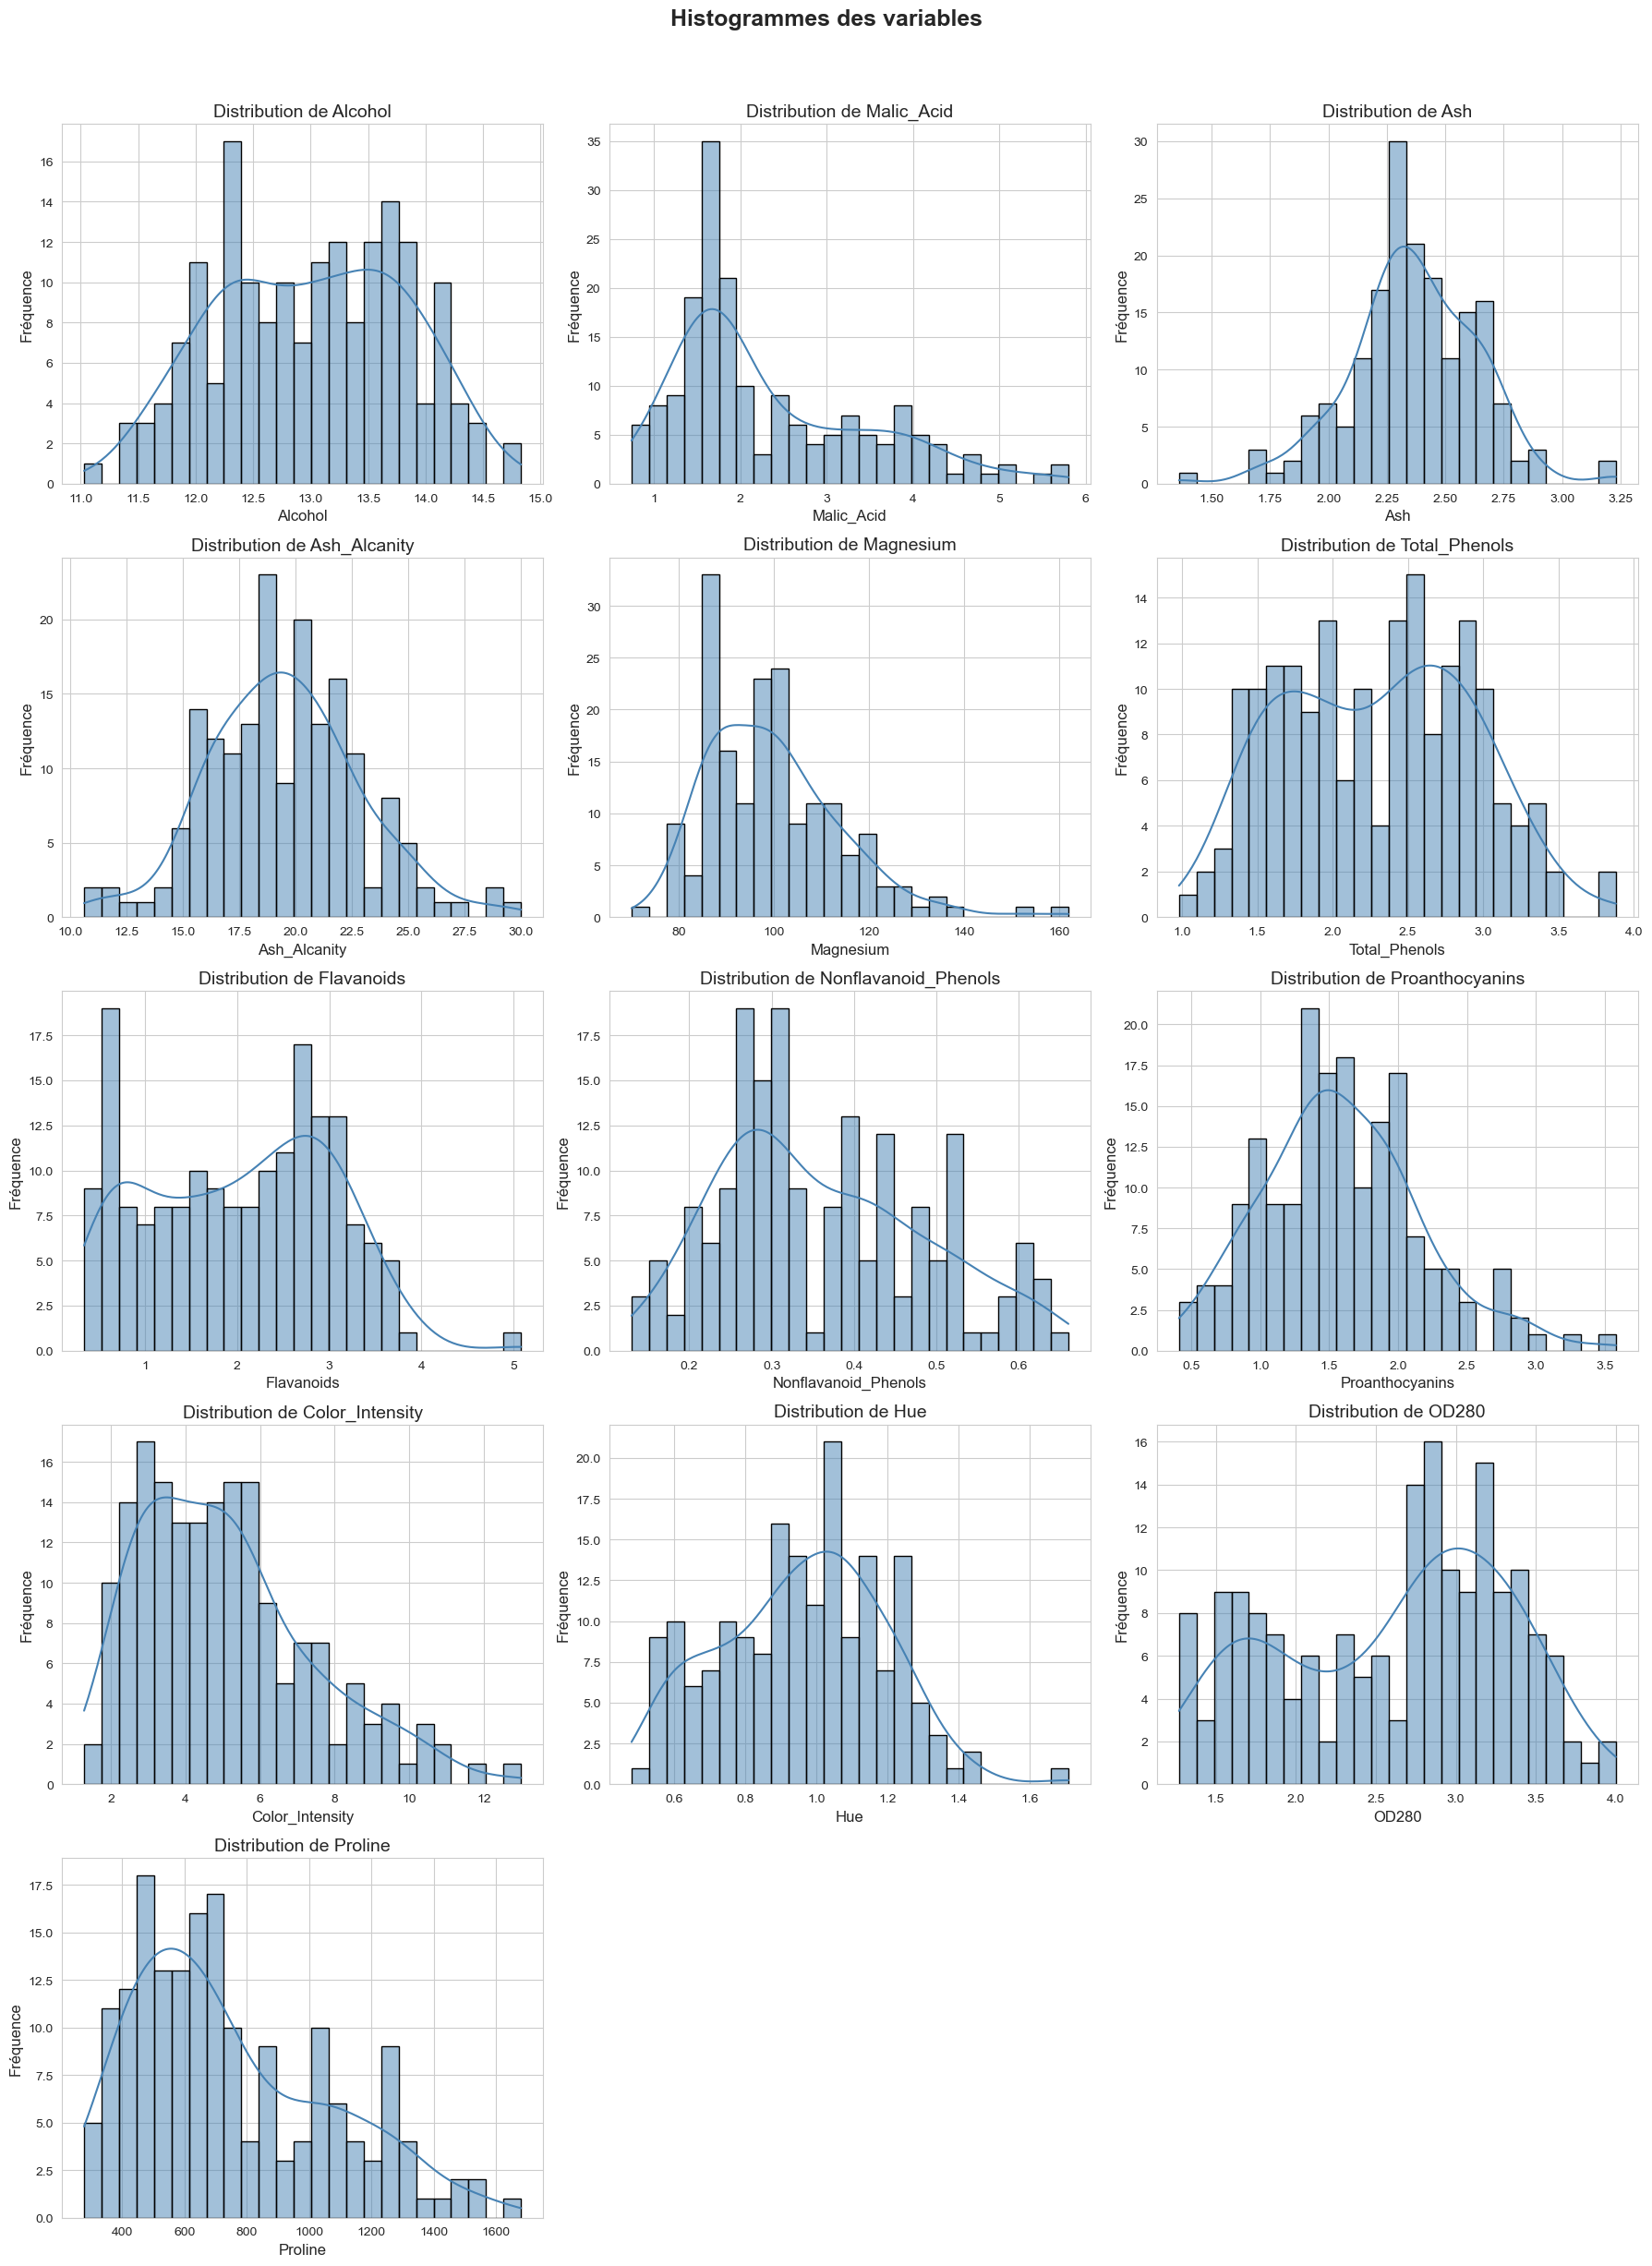

In [9]:
#Taçons les histogrammes de chaque variable
# Définir le style des graphiques
sns.set_style("whitegrid")

# Définir le nombre de colonnes et de lignes pour la disposition des graphiques
num_cols = len(data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 colonnes par ligne

# Définir la figure globale
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))  # Ajuster la taille

# Transformer en un tableau 1D pour itérer facilement
axes = axes.flatten()

# Boucle pour créer un histogramme pour chaque variable numérique
for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=25, kde=True, color="steelblue", edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Distribution de {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Fréquence", fontsize=12)
    statistic, p_value = stats.normaltest(data[column])
    
# Supprimer les axes vides s'il y a moins de sous-graphiques que d'espaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajouter un titre général
plt.suptitle("Histogrammes des variables", fontsize=18, fontweight="bold")

#Ajuster l'affichage
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de la place pour le titre général
plt.show()


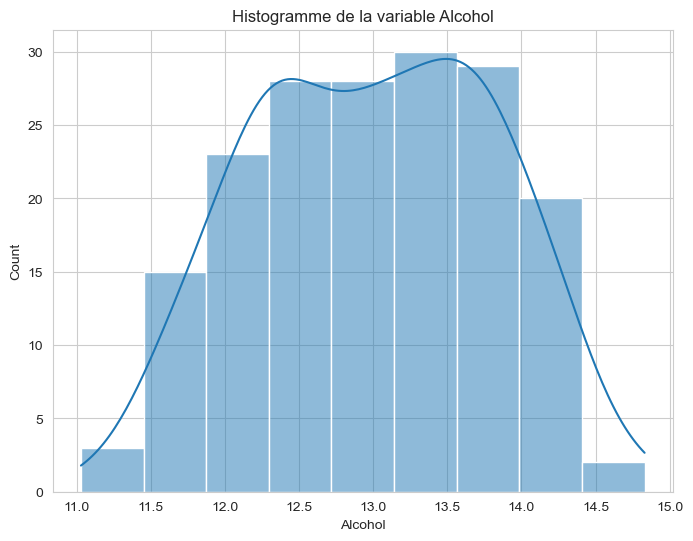

La variable Alcohol ne suit pas une loi normale (p-value=0.00034163202531285264)


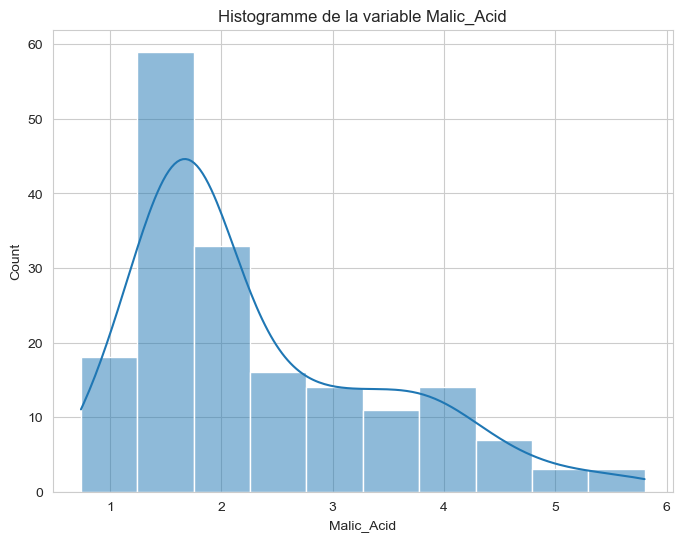

La variable Malic_Acid ne suit pas une loi normale (p-value=3.1742168603714762e-06)


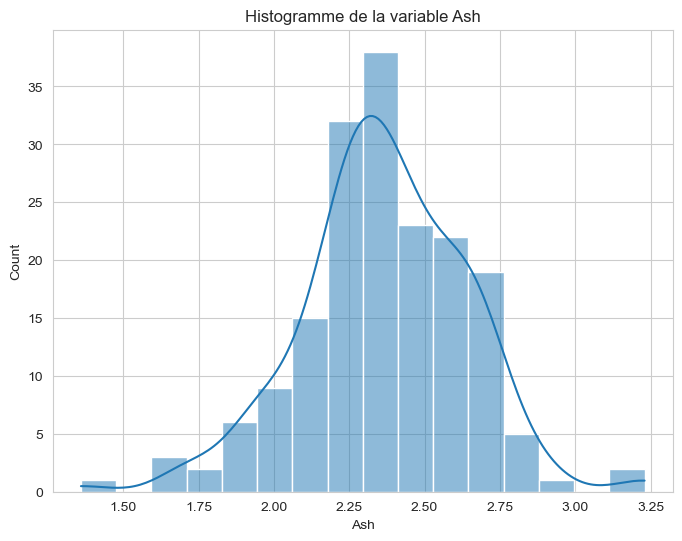

La variable Ash ne suit pas une loi normale (p-value=0.03631602067034469)


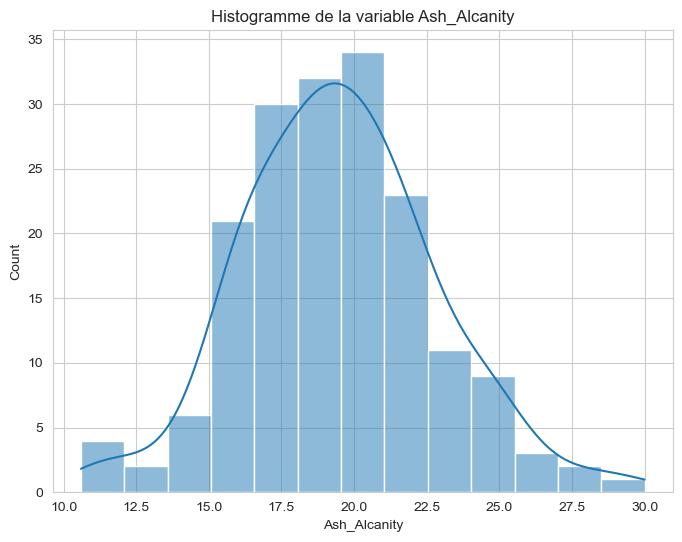

La variable Ash_Alcanity suit une loi normale (p-value=0.21004273588925534)


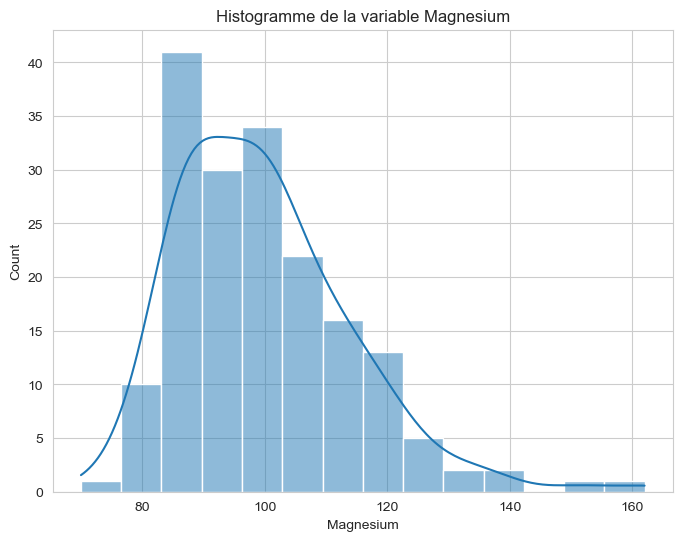

La variable Magnesium ne suit pas une loi normale (p-value=4.658884716268434e-09)


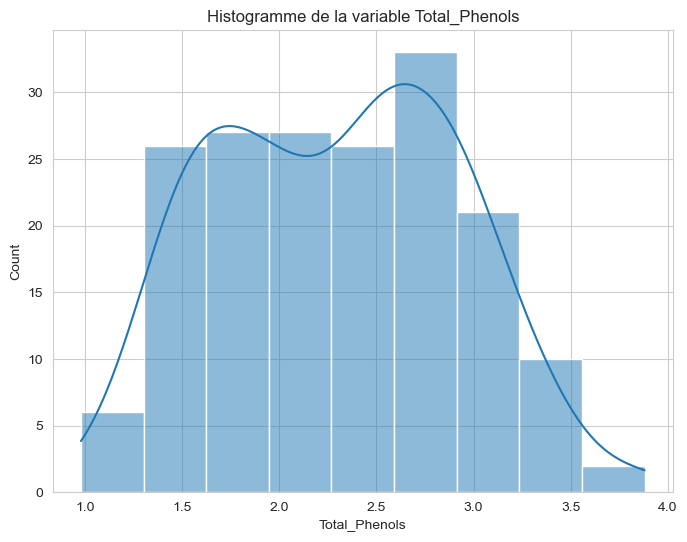

La variable Total_Phenols ne suit pas une loi normale (p-value=0.0005556667174637149)


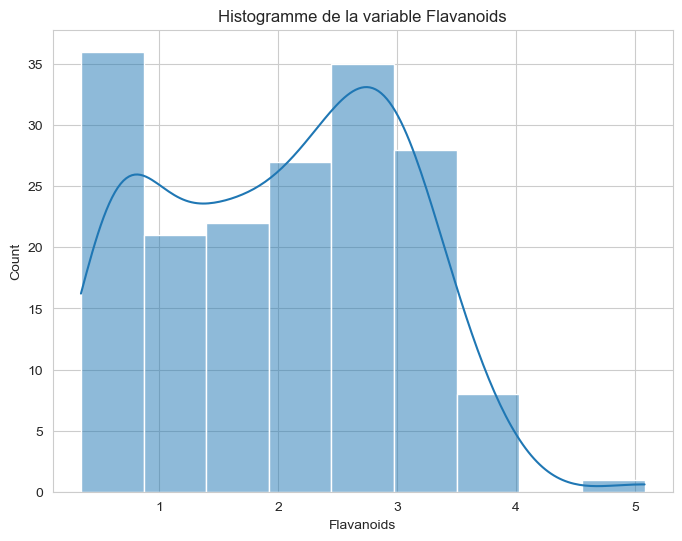

La variable Flavanoids ne suit pas une loi normale (p-value=0.00012693297763919295)


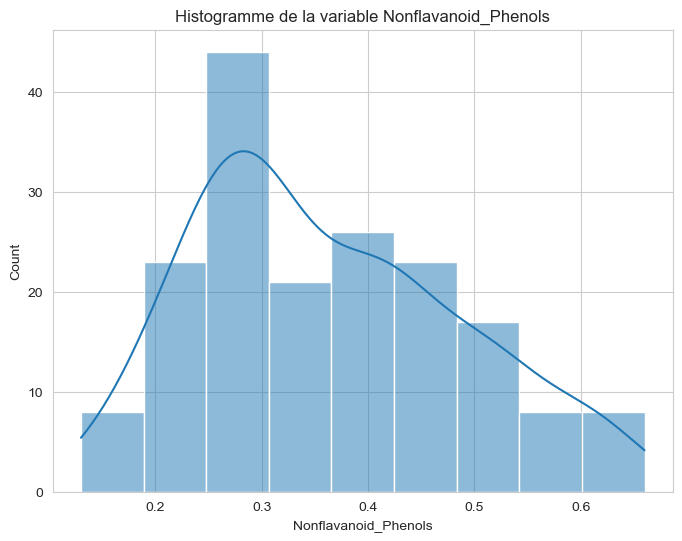

La variable Nonflavanoid_Phenols ne suit pas une loi normale (p-value=0.0026647025727076653)


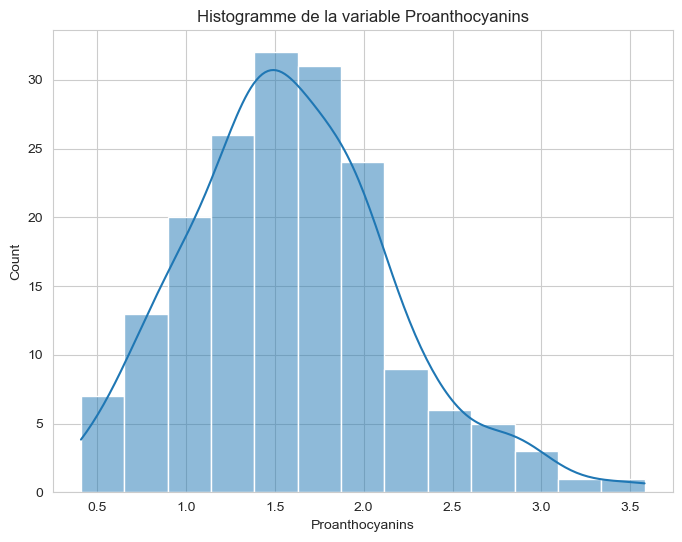

La variable Proanthocyanins ne suit pas une loi normale (p-value=0.008000813483971013)


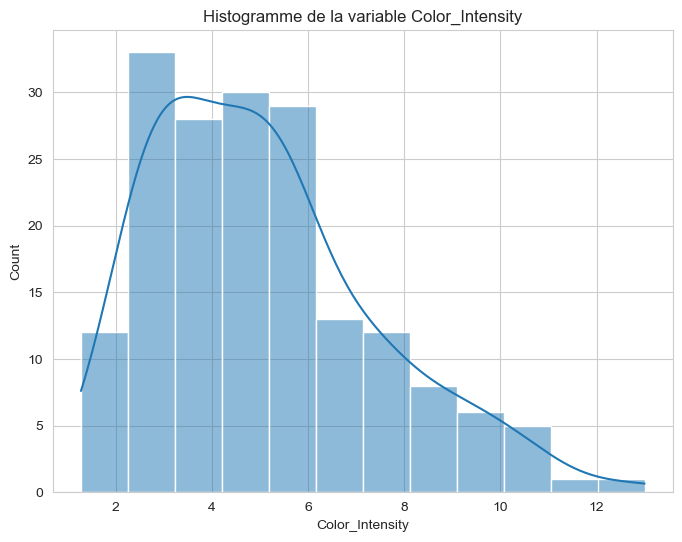

La variable Color_Intensity ne suit pas une loi normale (p-value=5.31947611640046e-05)


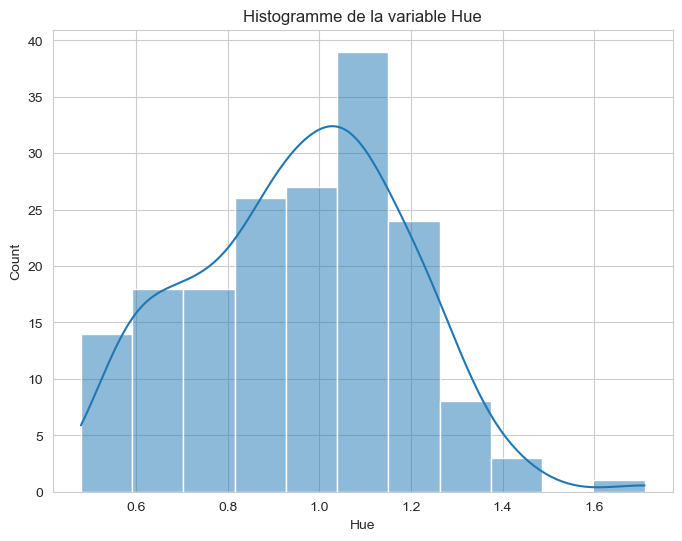

La variable Hue suit une loi normale (p-value=0.594729042205703)


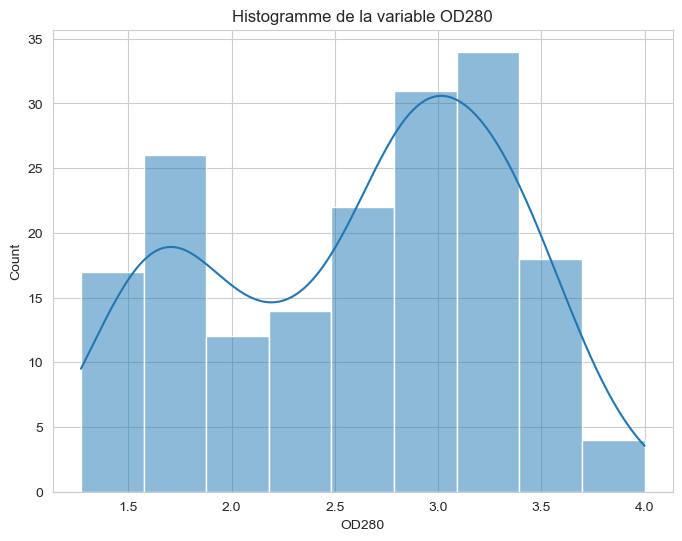

La variable OD280 ne suit pas une loi normale (p-value=4.8789809118220485e-11)


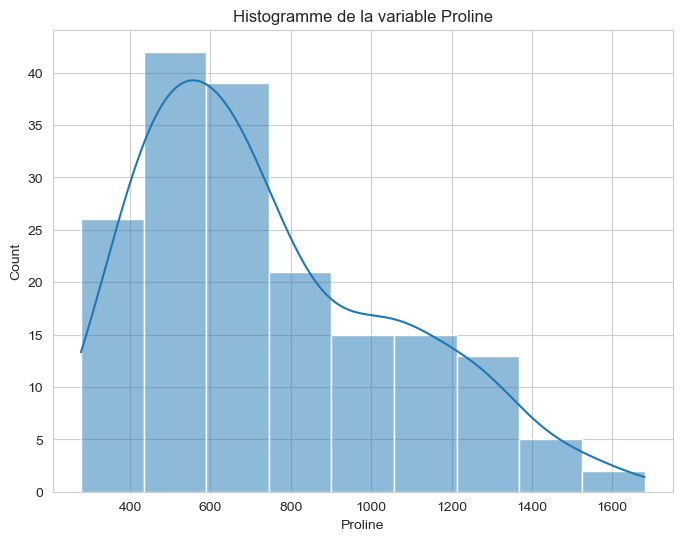

La variable Proline ne suit pas une loi normale (p-value=0.0004256462644890612)


In [10]:
# Analyse de la normalité
# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(data[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

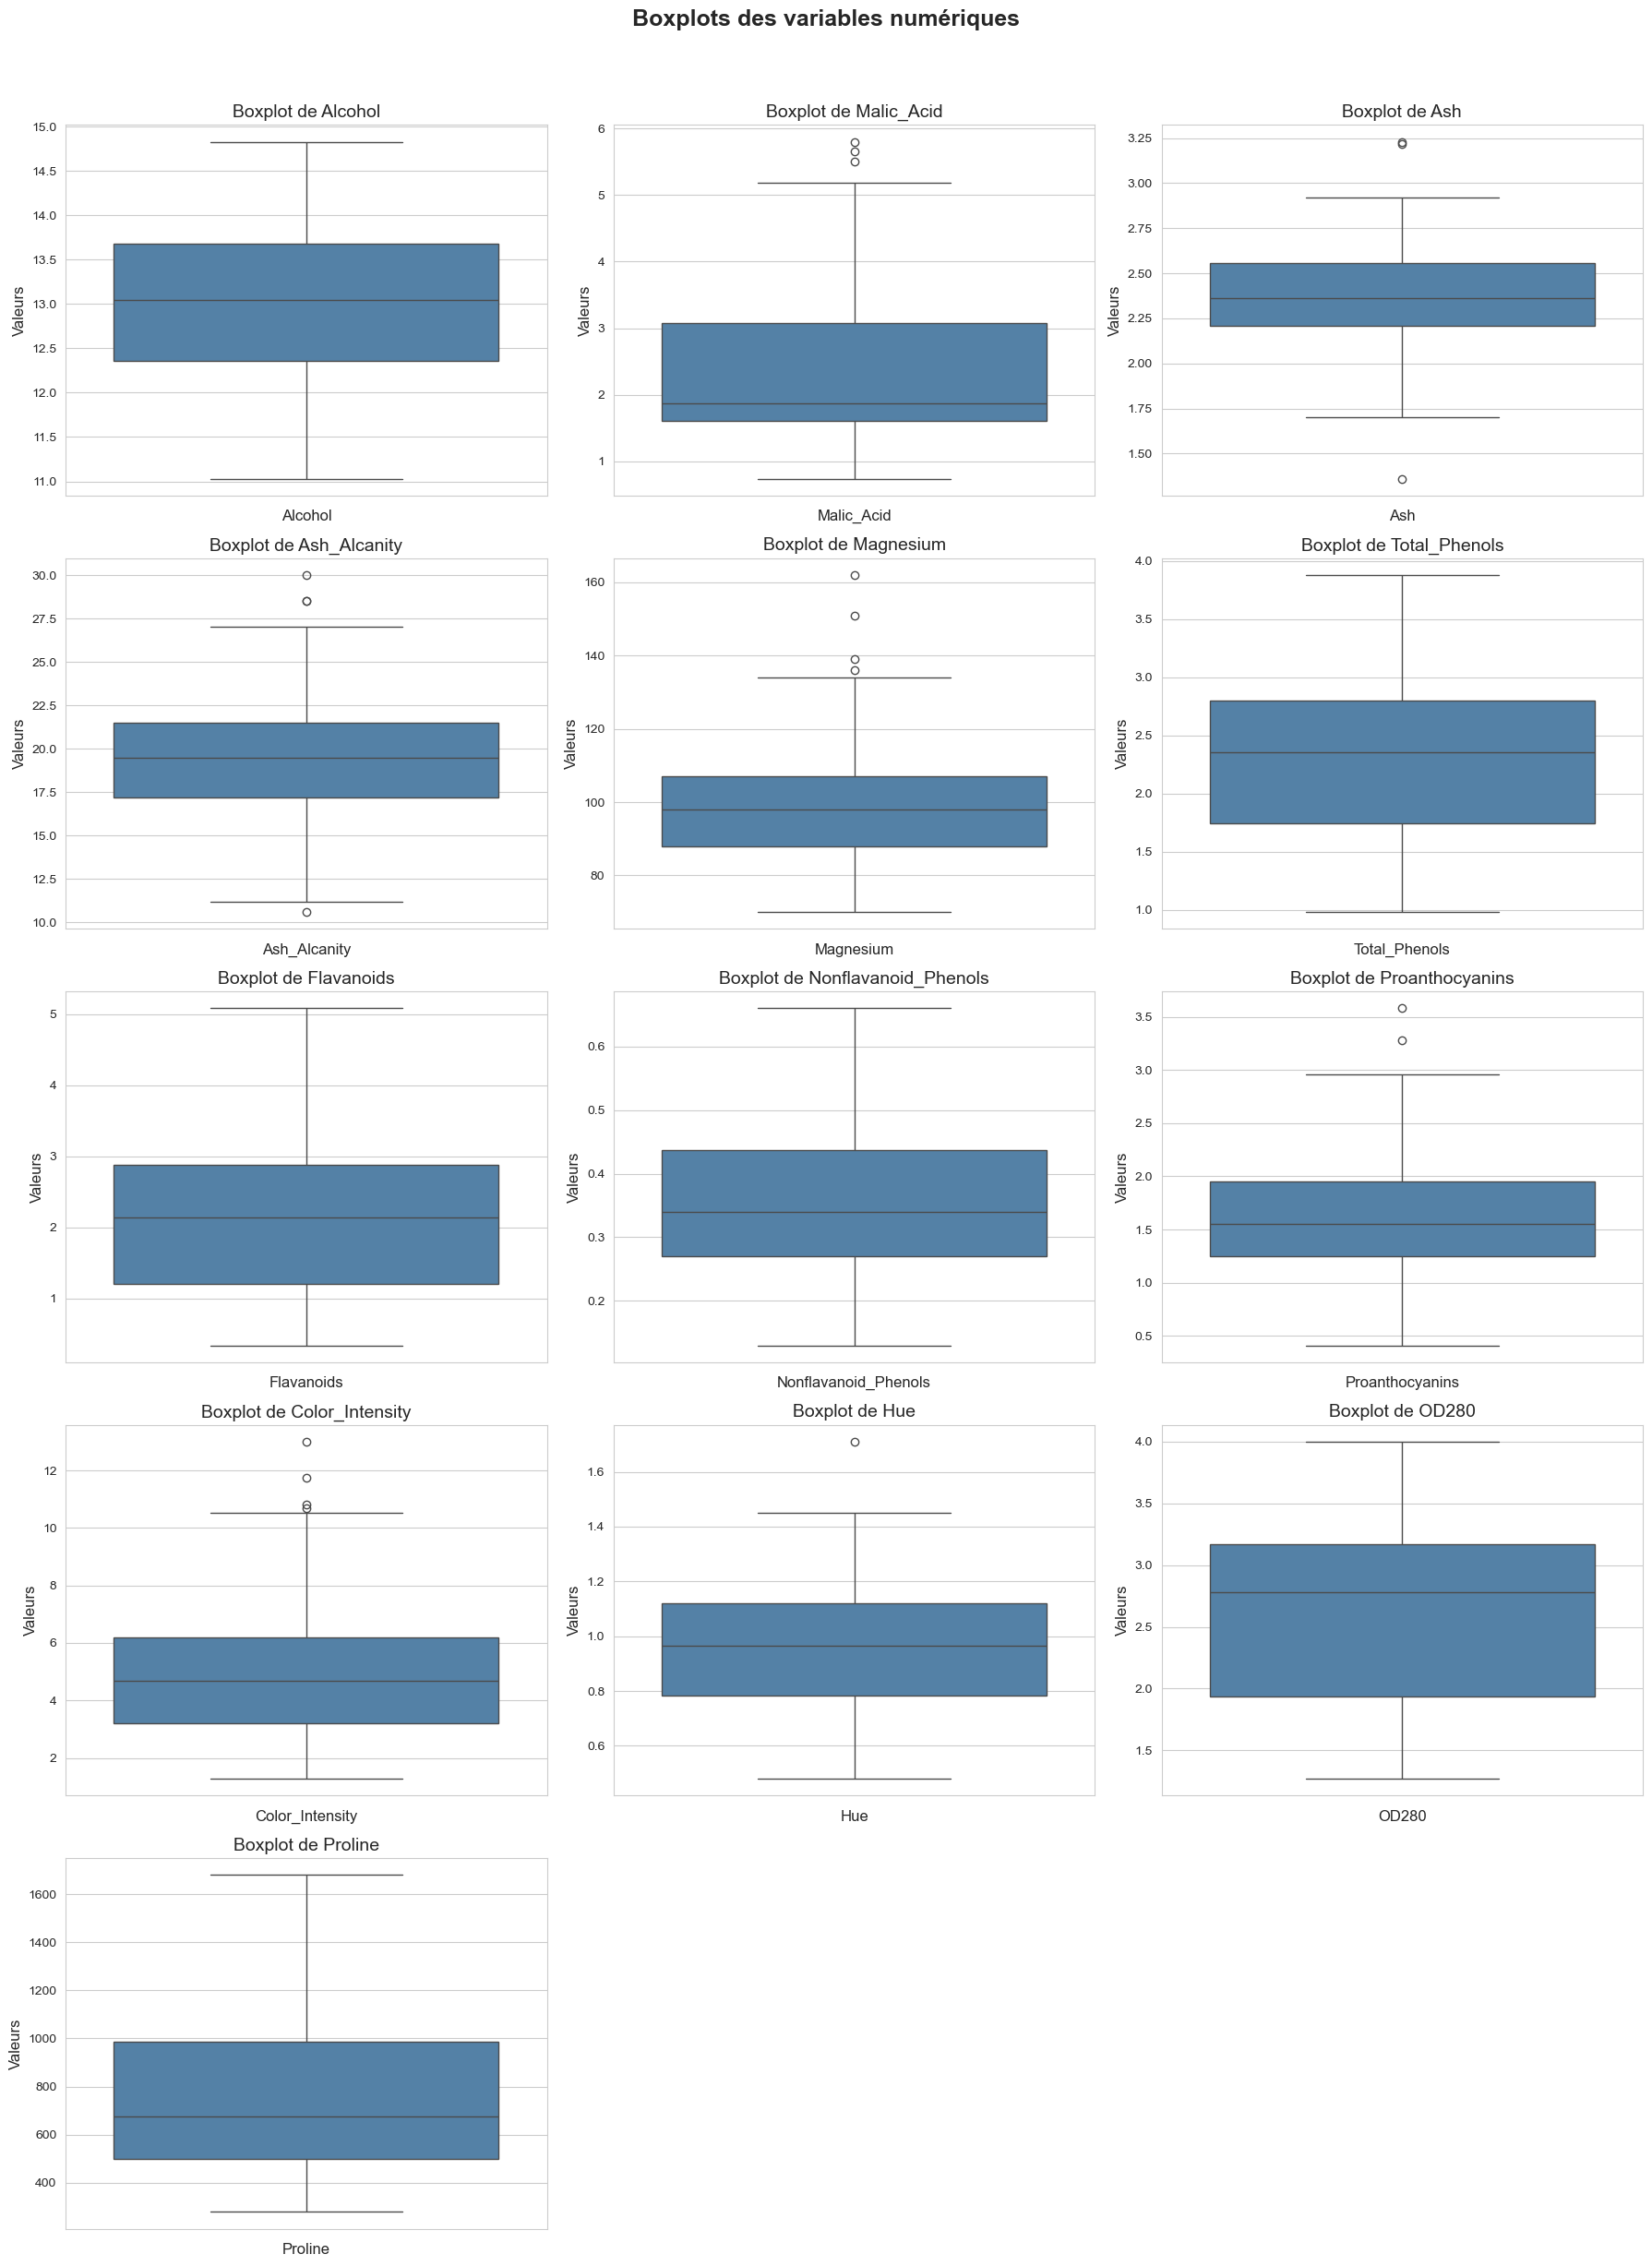

In [11]:
#Taçons les boxplots de chaque variable
# Définir le style des graphiques
sns.set_style("whitegrid")

# Définir le nombre de colonnes et de lignes pour la disposition des graphiques
num_cols = len(data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 colonnes par ligne

# Définir la figure globale
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))  # Ajuster la taille

# Transformer en un tableau 1D pour itérer facilement
axes = axes.flatten()

# Boucle pour créer un boxplot pour chaque variable numérique
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], color="steelblue", ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel("Valeurs", fontsize=12)

# Supprimer les axes vides s'il y a moins de sous-graphiques que d'espaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajouter un titre général
plt.suptitle("Boxplots des variables numériques", fontsize=18, fontweight="bold")

# Ajuster l'affichage
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de la place pour le titre général
plt.show()


# Analyse bivariées

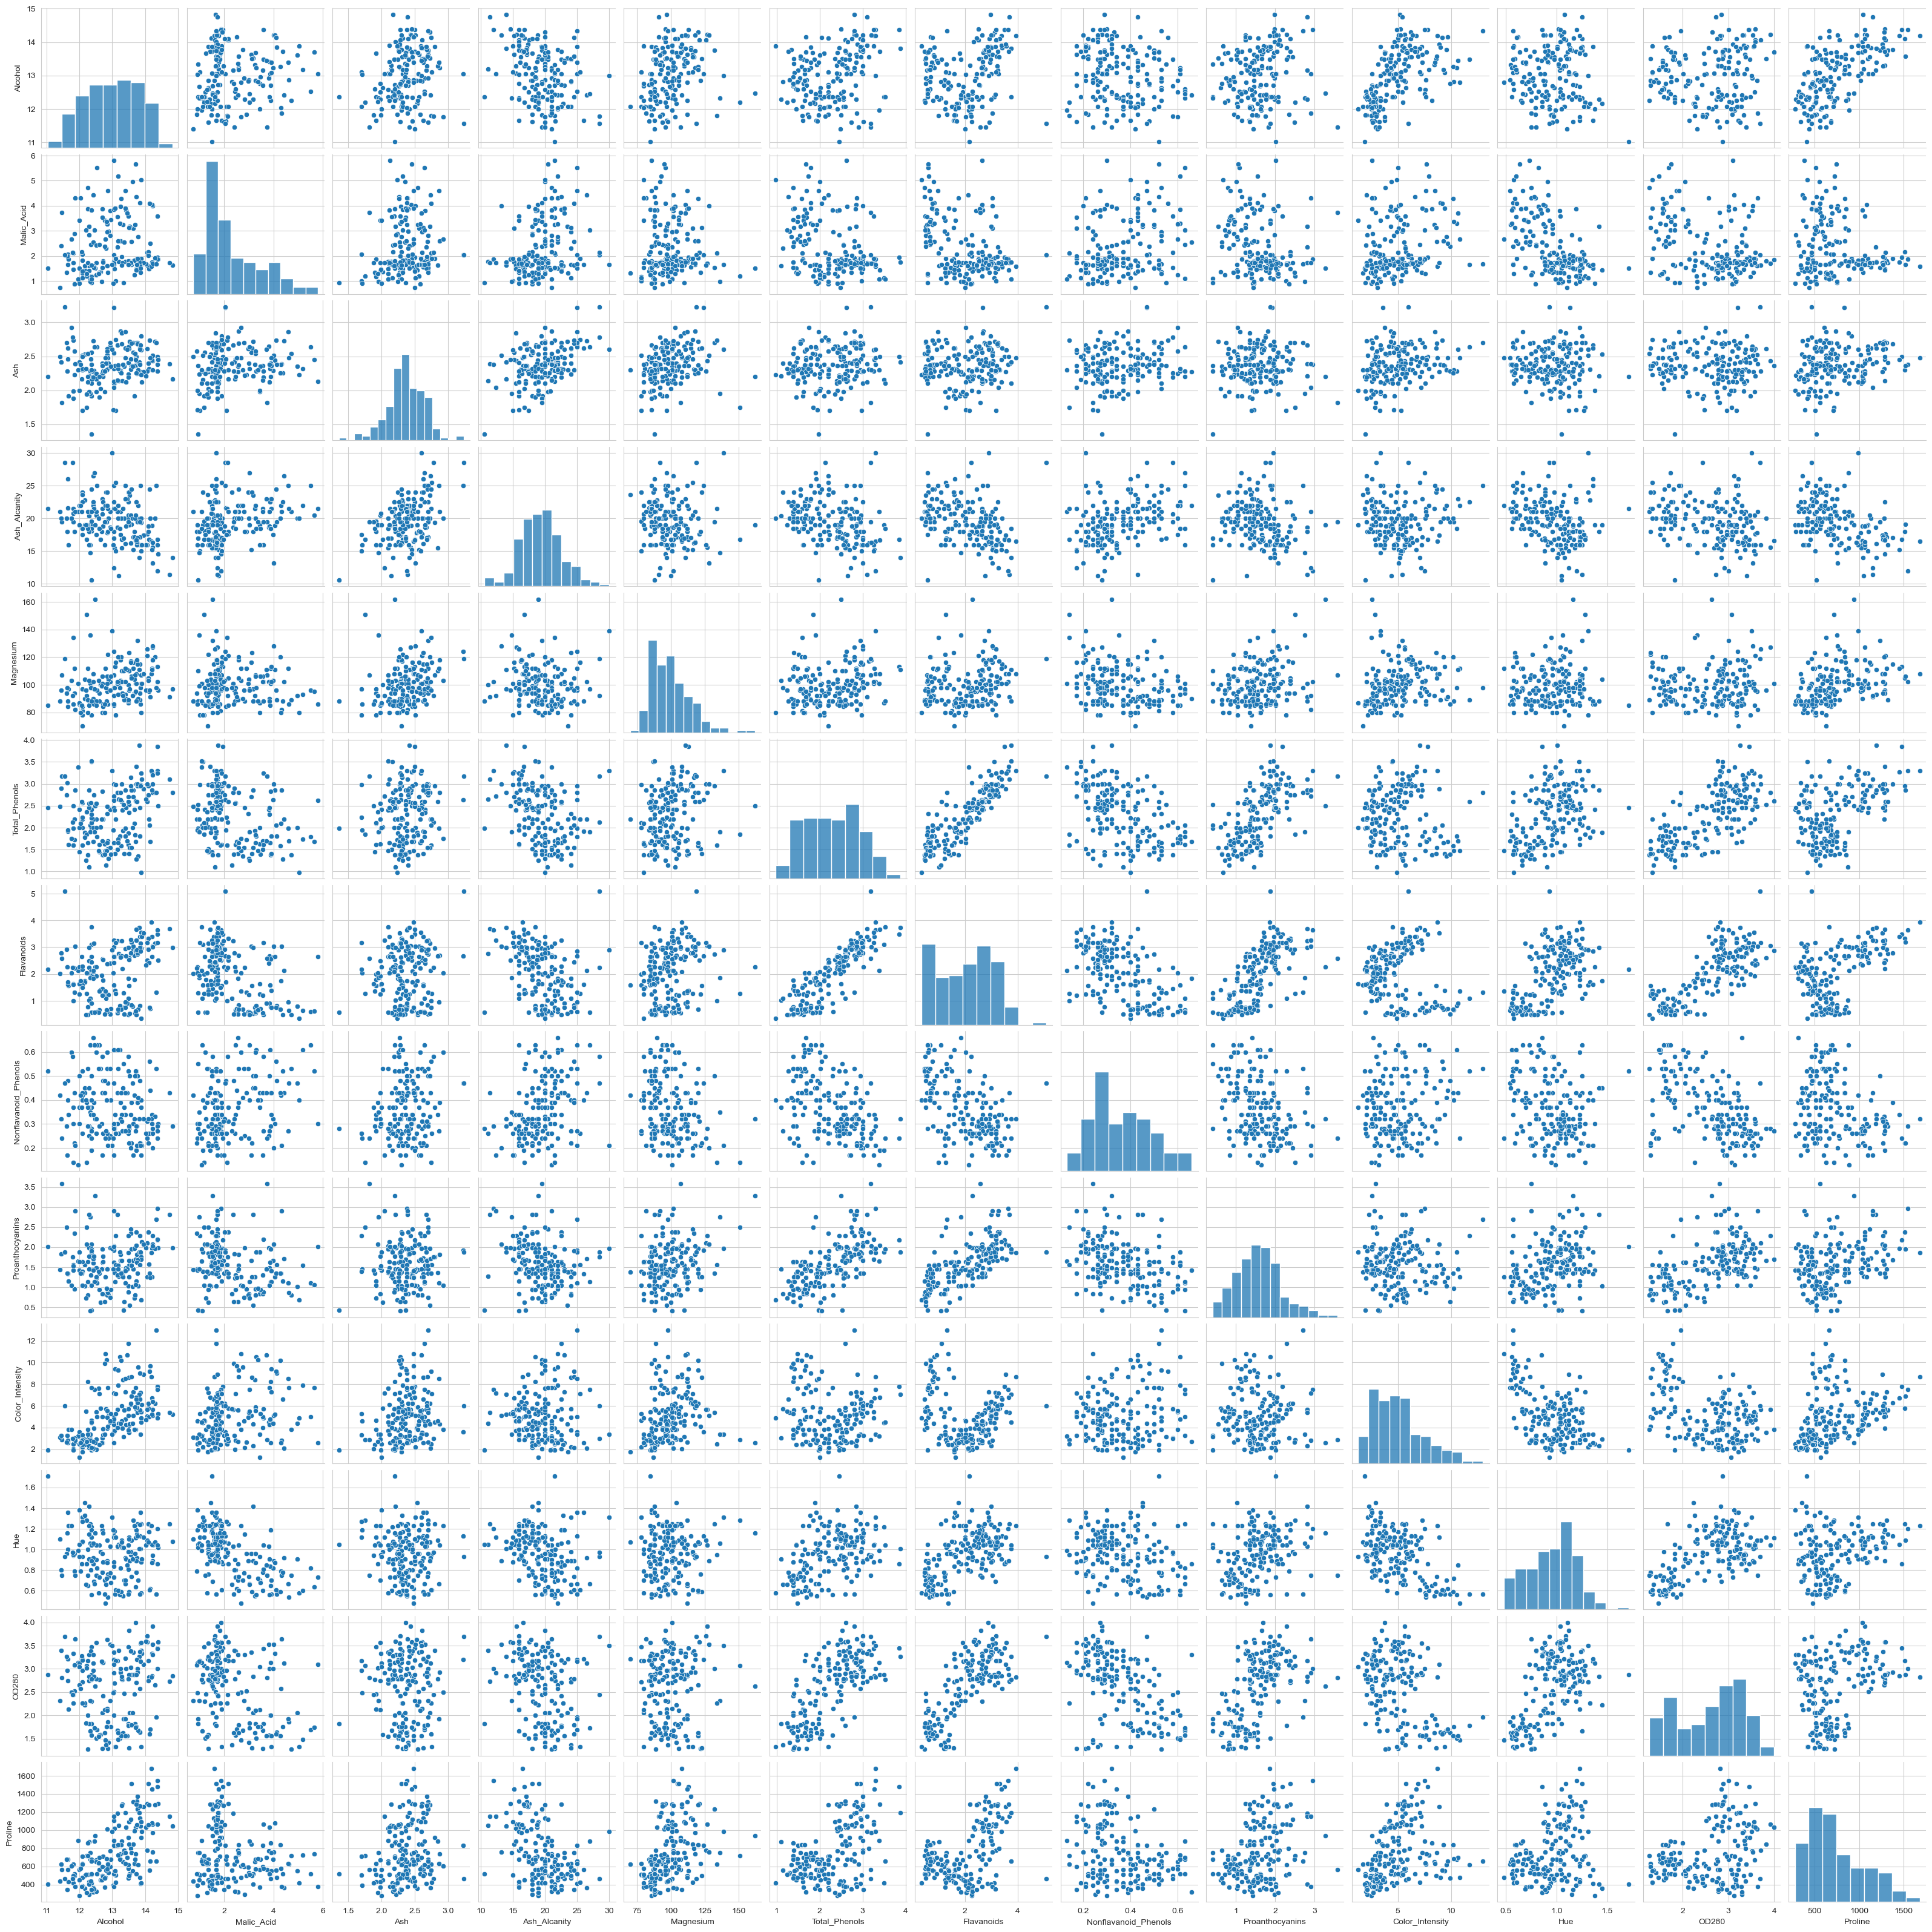

In [12]:
sns.pairplot(data)

<Axes: >

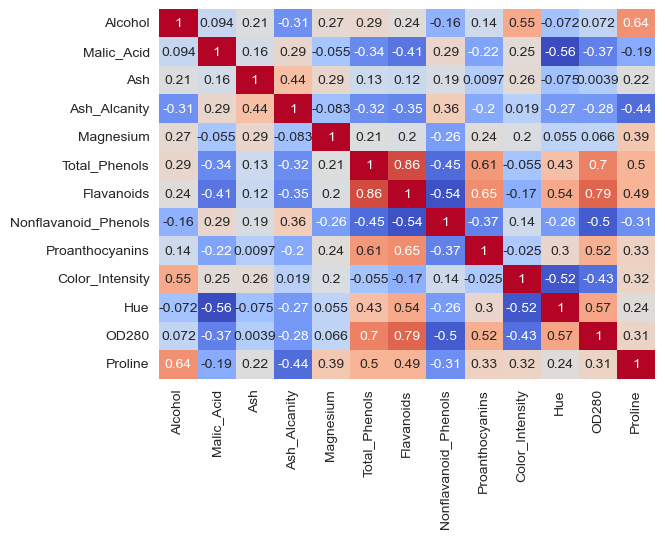

In [13]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', cbar= False)

# Réalisation de l'ACP

In [14]:
# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(data)

# ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

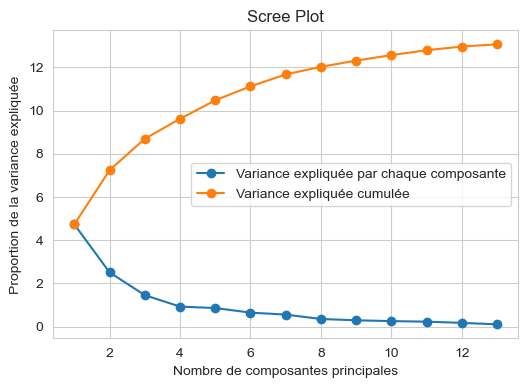

In [15]:
# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

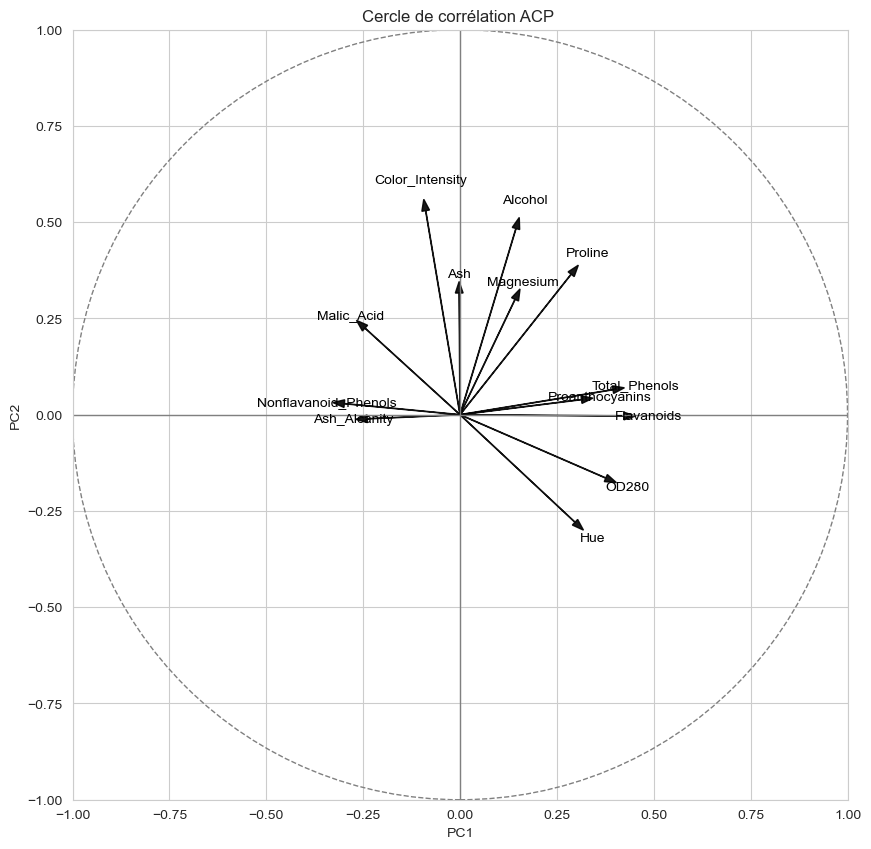

In [16]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()

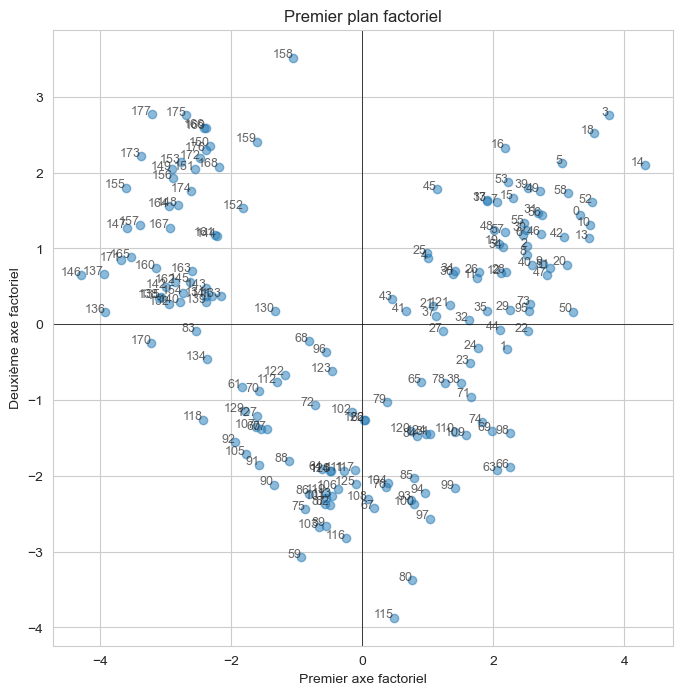

In [17]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (par exemple, les indices des points)
for i, label in enumerate(data.index):  # ou utilisez df['nom_de_colonne'] pour des étiquettes spécifiques
    ax.annotate(label, (df_pca[i, 0], df_pca[i, 1]), alpha=0.7, fontsize=9, ha='right')

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()


# Détermination des clusters avec les Kmeans

In [18]:
# Choix du nombre optimal de clusters (méthode du coude)
inertia = []
K = range(2, 10)
for k in (K):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_normalized)
    inertia.append(model.inertia_)

C:\Users\AHOUGBE Kelly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AHOUGBE Kelly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AHOUGBE Kelly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\AHOUGBE Kelly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

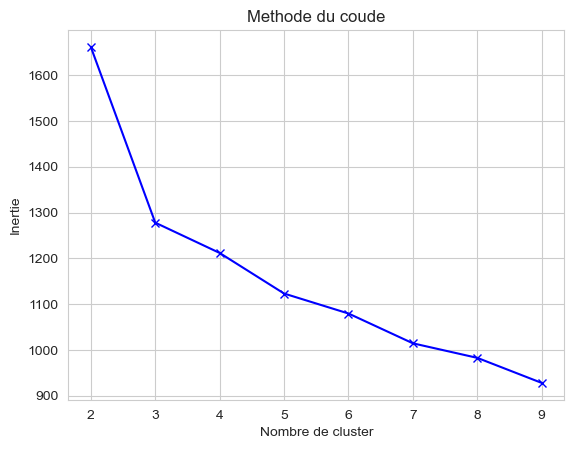

In [19]:
# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie')
plt.title('Methode du coude')
plt.show()

In [20]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour ce cas)
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_normalized)

C:\Users\AHOUGBE Kelly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [21]:
y = model.predict(df_normalized)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [22]:
np.unique(y)

array([0, 1, 2])

In [23]:
# Trouver les clusters uniques
unique_clusters, counts = np.unique(y, return_counts=True)

# Afficher le nombre d'individus par cluster
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} Vin")

Cluster 0: 65 Vin
Cluster 1: 51 Vin
Cluster 2: 62 Vin


In [24]:
centroids = model.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=data.columns)
df_centroids

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


In [25]:
centroids_original = scaler.inverse_transform(centroids)
df_1centroids = pd.DataFrame(centroids_original, columns=data.columns)
df_1centroids

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


# Rapport de l'analyse

Rapport de l'analyse des vins

L’analyse des vins permet de mieux comprendre leurs caractéristiques chimiques et d’identifier des similarités entre différentes productions. Cette étude repose sur l’examen de 13 constituants clés, mesurés sur des vins issus de la même région en Italie, mais provenant de trois cépages distincts.
En appliquant des méthodes d’apprentissage non supervisé, nous cherchons à regrouper ces vins selon leurs propriétés chimiques, sans connaissance préalable des cépages. Cette analyse vise à révéler des structures sous-jacentes dans les données, permettant d’explorer des relations entre les composants du vin et de mieux appréhender leur influence sur la qualité et les distinctions entre les productions. 

Ainsi nous avons segmenté les vins en trois groupes distints à savoir:
- Vins frais et élégant: ce sont des vins légers, modérément acides, avec une structure minérale et fruitée. Ils sont équilibrés et faciles à boire, parfaits pour ceux qui recherchent un vin frais, mais pas trop agressif. (Cluster 0)
- Vin dynamique et fruité: ce sont des vins un peu plus alcoolisés, avec une acidité modérée et un profil plus fruité et vif. Ils sont parfaits pour ceux qui recherchent des vins jeunes et dynamiques avec un goût frais et agréable. (cluster 1)
- Vin puissant et complexe: ce sont des vins plus puissants, tanniques et complexes, avec un fort contenu en proline. Ce sont des vins plus robustes, adaptés aux amateurs de saveurs profondes et de vins qui peuvent se bonifier avec le temps. (cluster 2)

Cette segmentation des vins met en évidence des profils distincts basés sur leurs caractéristiques chimiques, permettant ainsi une meilleure compréhension des différentes productions. Grâce à cette analyse, il devient possible d’orienter le choix des consommateurs selon leurs préférences et d’optimiser les stratégies de commercialisation. Enfin, cette approche peut être affinée par des analyses complémentaires afin de mieux cerner l’influence de chaque composant sur la qualité perçue des vins.

Wine analysis report

The analysis of wines enables us to better understand their chemical characteristics and to identify similarities between different productions. This study is based on the examination of 13 key constituents, measured on wines from the same region in Italy, but from three distinct grape varieties. By applying unsupervised learning methods, we aim to group these wines according to their chemical properties, without prior knowledge of the grape varieties. This analysis aims to reveal underlying structures in the data, enabling us to explore relationships between wine components and better understand their influence on quality and distinctions between productions.

We have thus segmented the wines into three distinct groups:
- Fresh, elegant wines: these are light, moderately acidic wines with a mineral, fruity structure. They are balanced and easy to drink, perfect for those looking for a fresh, but not too aggressive wine. (Cluster 0)
- Dynamic and fruity wines: these are slightly higher alcohol wines, with moderate acidity and a more fruity, lively profile. They are ideal for those looking for young, dynamic wines with a fresh, pleasant taste. (cluster 1)
- Powerful, complex wine: these are more powerful, tannic and complex wines, with a high proline content. These are more robust wines, suited to lovers of deep flavors and wines that can improve over time. (cluster 2)

This segmentation of wines highlights distinct profiles based on their chemical characteristics, enabling a better understanding of the different productions. Thanks to this analysis, it becomes possible to orient consumer choices according to their preferences, and to optimize marketing strategies. Finally, this approach can be refined by additional analyses to better define the influence of each component on perceived wine quality.